In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set plot style
sns.set_style("whitegrid")

In [ ]:
df = pd.read_csv('../data/complaints.csv', dtype={'ZIP code': str})
print("Dataset loaded successfully.")
df.head()

print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nData Info:")
df.info()

C:\Users\HP\AppData\Local\Temp\ipykernel_11324\1233135656.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/complaints.csv', dtype={'ZIP code': str})


Dataset loaded successfully.
Dataset Shape: (9609797, 18)

Columns: Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8  

C:\Users\HP\AppData\Local\Temp\ipykernel_11324\3261743784.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.values, y=product_counts.index, palette='viridis')


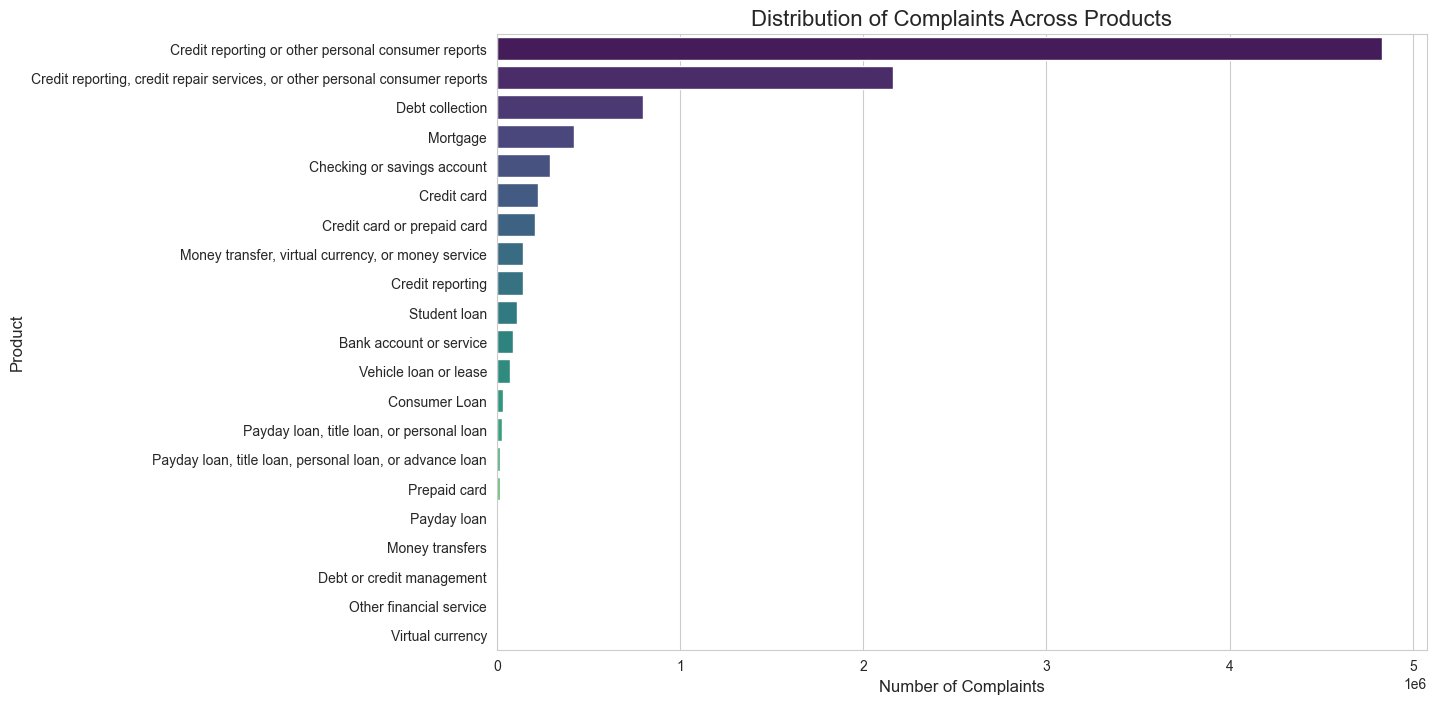

In [3]:
plt.figure(figsize=(12, 8))
product_counts = df['Product'].value_counts()
sns.barplot(x=product_counts.values, y=product_counts.index, palette='viridis')
plt.title('Distribution of Complaints Across Products', fontsize=16)
plt.xlabel('Number of Complaints', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.show()

In [5]:
product_mapping = {
    'Credit card or prepaid card': 'Credit Cards',
    'Credit card': 'Credit Cards',
    'Personal loan': 'Personal Loans',
    'Payday loan, title loan, or personal loan': 'Personal Loans',
    'Buy now pay later': 'Buy Now, Pay Later (BNPL)',
    'Checking or savings account': 'Savings Accounts',
    'Money transfer, virtual currency, or money service': 'Money Transfers'
}

# Filter rows where 'Product' is in our mapping keys
df_filtered = df[df['Product'].isin(product_mapping.keys())].copy()

# Create a new simplified 'Product_Category' column
df_filtered['Product_Category'] = df_filtered['Product'].map(product_mapping)

print(f"Original dataset size: {len(df)}")
print(f"Filtered dataset size: {len(df_filtered)}")
print("\nNew Product Category Distribution:")
print(df_filtered['Product_Category'].value_counts())




Original dataset size: 9609797
Filtered dataset size: 899940

New Product Category Distribution:
Credit Cards        433055
Savings Accounts    291178
Money Transfers     145066
Personal Loans       30641
Name: Product_Category, dtype: int64


In [6]:

print(f"Complaints with narratives: {df_filtered['Consumer complaint narrative'].notna().sum()}")
print(f"Complaints without narratives: {df_filtered['Consumer complaint narrative'].isna().sum()}")

# Remove records with empty narratives
df_cleaned = df_filtered.dropna(subset=['Consumer complaint narrative']).copy()
print(f"\nDataset size after removing empty narratives: {len(df_cleaned)}")


Complaints with narratives: 444079
Complaints without narratives: 455861

Dataset size after removing empty narratives: 444079


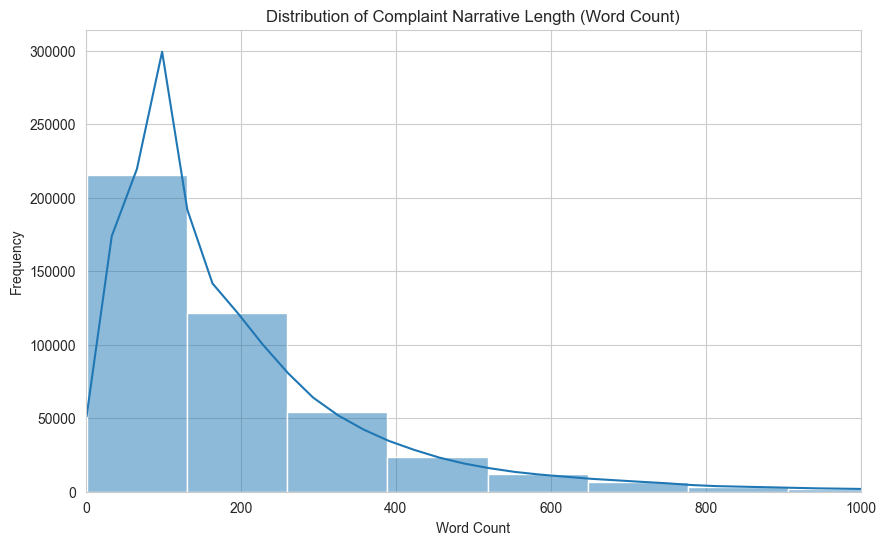


Narrative Length Statistics:
count    444079.000000
mean        205.030224
std         228.180086
min           1.000000
25%          82.000000
50%         136.000000
75%         254.000000
max        6469.000000
Name: narrative_length, dtype: float64


In [7]:
df_cleaned['narrative_length'] = df_cleaned['Consumer complaint narrative'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['narrative_length'], bins=50, kde=True)
plt.title('Distribution of Complaint Narrative Length (Word Count)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.xlim(0, 1000) # Limiting for better visualization
plt.show()

print("\nNarrative Length Statistics:")
print(df_cleaned['narrative_length'].describe())

In [8]:
def clean_text(text):
    text = text.lower() # Lowercase text
    text = re.sub(r'xxxx|xx/xx/\d{4}|xx/xx/xxxx', '', text) # Remove redacted info
    text = re.sub(r'[^a-z\s]', '', text) # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespace
    return text

df_cleaned['cleaned_narrative'] = df_cleaned['Consumer complaint narrative'].apply(clean_text)

# Display before and after cleaning
print("\n--- Text Cleaning Example ---")
print("Original:\n", df_cleaned['Consumer complaint narrative'].iloc[0])
print("\nCleaned:\n", df_cleaned['cleaned_narrative'].iloc[0])


--- Text Cleaning Example ---
Original:
 A XXXX XXXX card was opened under my name by a fraudster. I received a notice from XXXX  that an account was just opened under my name. I reached out to XXXX XXXX to state that this activity was unauthorized and not me. XXXX XXXX confirmed this was fraudulent and immediately closed the card. However, they have failed to remove this from the three credit agencies and this fraud is now impacting my credit score based on a hard credit pull done by XXXX XXXX that was done by a fraudster.

Cleaned:
 a card was opened under my name by a fraudster i received a notice from that an account was just opened under my name i reached out to to state that this activity was unauthorized and not me confirmed this was fraudulent and immediately closed the card however they have failed to remove this from the three credit agencies and this fraud is now impacting my credit score based on a hard credit pull done by that was done by a fraudster


In [9]:
final_df = df_cleaned[['Complaint ID', 'Product_Category', 'cleaned_narrative']].copy()
final_df.rename(columns={'Complaint ID': 'complaint_id', 'Product_Category': 'product', 'cleaned_narrative': 'narrative'}, inplace=True)


df_sampled = final_df.groupby('product').apply(lambda x: x.sample(n=2000, random_state=42)).reset_index(drop=True)

print("\nFinal Sampled Dataset Shape:", df_sampled.shape)
print("\nSampled Product Distribution:")
print(df_sampled['product'].value_counts())

# Save to a new CSV file
output_path = '../data/filtered_complaints.csv'
df_sampled.to_csv(output_path, index=False)

print(f"\nCleaned and filtered dataset saved to {output_path}")


Final Sampled Dataset Shape: (8000, 3)

Sampled Product Distribution:
Credit Cards        2000
Money Transfers     2000
Personal Loans      2000
Savings Accounts    2000
Name: product, dtype: int64

Cleaned and filtered dataset saved to ../data/filtered_complaints.csv
